Цель домашнего задания:уменшить размерность векторного представления слов текстуальных данных. Построить графики уменьшения размерности.
    
[x] Загрузка текстового файла из корневого каталога.

[x] Обработка текстовых данных.

[] Понижение размерности текстовых данных.

[] Построить график объема информации.

In [ ]:
!pip install spacy
!python -m spacy download ru_core_news_sm

In [ ]:
import pandas as pd

In [9]:
from google.colab import files

uploaded = files.upload()

Saving lev-tolstoi-tri-medvedya.txt to lev-tolstoi-tri-medvedya (1).txt


In [10]:
# Чтение содержимого файла
with open('lev-tolstoi-tri-medvedya.txt', 'r') as file:
    content = file.read()

# Вывод содержимого файла
print(content)

Три медведя - Лев Толстой
Одна девочка ушла из дома в лес. В лесу она заблудилась и стала искать дорогу домой, да не нашла, а пришла в лесу к домику.
Дверь была отворена: она посмотрела в дверь, видит — в домике никого нет, и вошла. В домике этом жили три медведя. Один медведь был отец, звали его Михаил Иваныч. Он был большой и лохматый. Другой была медведица. Она была поменьше, и звали ее Настасья Петровна. Третий был маленький медвежонок, и звали его Мишутка. Медведей не было дома, они ушли гулять по лесу.
В домике было две комнаты: одна столовая, другая спальня. Девочка вошла в столовую и увидела на столе три чашки с похлебкой. Первая чашка, очень большая, была Михайлы Ивановичева. Вторая чашка, поменьше, была Настасьи Петровнина; третья, синенькая чашечка, была Мишуткина. Подле каждой чашки лежала ложка: большая, средняя и маленькая.
Девочка взяла самую большую ложку и похлебала из самой большой чашки; потом взяла среднюю ложку и похлебала из средней чашки, потом взяла маленькую ло

In [36]:
import re

def extract_words(text):
    # Разделение текста на слова, игнорируя знаки препинания
    words = re.findall(r'\b\w+\b', text.lower())

    return words

def process_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Извлечение слов из текста
    word_list = extract_words(text)

    # Подсчет уникальных слов
    unique_words = set(word_list)
    unique_word_count = len(unique_words)

    return {
        "total_words": len(word_list),
        "unique_word_count": unique_word_count,
        "unique_words": list(unique_words)
    }

file_path = 'lev-tolstoi-tri-medvedya.txt'
result = process_text(file_path)

# Вывод результатов
print("Общее количество слов в тексте:", result["total_words"])
print("Уникальное количество слов:", result["unique_word_count"])


Общее количество слов в тексте: 516
Уникальное количество слов: 232


In [41]:
print(result["unique_words"])

['медведица', 'и', 'похлебку', 'пришла', 'не', 'чашечку', 'горницу', 'другая', 'искать', 'маленький', 'взяла', 'сесть', 'третья', 'чашечки', 'мишуткин', 'встала', 'другую', 'сдвинул', 'скамеечку', 'яяй', 'завизжал', 'подставил', 'похлебка', 'лохматый', 'столе', 'увидал', 'отец', 'тонким', 'видит', 'столовую', 'этом', 'пришлась', 'пустую', 'выхлебал', 'медведь', 'открыто', 'взглянула', 'синенькую', 'упала', 'очень', 'ей', 'нем', 'петровнин', 'пошла', 'просторно', 'маленькую', 'михайло', 'одна', 'а', 'иванычева', 'нет', 'стояли', 'раз', 'постель', 'михаил', 'вдруг', 'ложку', 'стула', 'ушла', 'мишуткина', 'толстого', 'петровнина', 'села', 'пропищал', 'по', 'ивановичева', 'толстой', 'у', 'неловко', 'сломал', 'маленькая', 'ложка', 'страшным', 'обедать', 'синенькой', 'с', 'проломился', 'мишенькина', 'да', 'они', 'ай', 'к', 'иваныч', 'две', 'иваныча', 'поела', 'медведей', 'дверь', 'стала', 'домику', 'кровати', 'столовая', 'впору', 'как', 'убежала', 'так', 'лесу', 'третий', 'гулять', 'на', 'до

In [43]:
import spacy
from spacy.lang.ru import Russian

# Загрузка предварительно обученной модели для русского языка
nlp = spacy.load("ru_core_news_sm")

# Обработка текста
doc = nlp(content)

def get_word_vectors(words):
    '''
    Функция конвертирует список слов в их векторное представление
    '''
    ar = []
    for i in words:
        ar.append(nlp(i).vector)
    return ar

# Получение векторов для уникальных слов
word_vector_list = get_word_vectors(result["unique_words"])

In [ ]:
# Вывод векторов
#for word, vector in zip(result["unique_words"], word_vector_list):
    #print(f"Слово: {word}, Вектор: {vector}")

In [45]:
word_vector_list[0]

array([-1.2411847 ,  3.378463  , -0.8902735 ,  0.56886697,  0.68792313,
       -0.10710011,  0.11617315, -2.3000093 , -0.70104957, -0.7740142 ,
       -0.38665944,  0.7221863 , -2.136806  ,  0.39461085,  2.5061507 ,
        1.1330273 , -1.4692509 , -0.45310932, -1.3187152 ,  0.22324942,
       -1.8308098 ,  0.06689811, -0.89662236,  0.23845011, -1.8569558 ,
       -0.5589424 ,  2.0481093 , -0.8565359 , -0.07473028, -0.40922883,
       -1.2872043 , -0.56676567,  1.908834  , -0.59564906, -0.9880081 ,
       -0.37848258, -0.20347857,  0.07178262,  3.6407666 ,  6.2596498 ,
        2.4329839 , -1.829563  ,  1.9315815 ,  0.15919948,  0.48325774,
        0.603062  , -1.154542  ,  0.0982371 ,  1.9895258 , -1.0694482 ,
       -1.0391626 ,  1.6870759 ,  1.6322604 , -0.27137542,  1.4728136 ,
       -1.7129202 , -1.7398186 ,  1.4601424 , -0.27816537,  0.66221297,
       -2.0339298 ,  0.16861692,  1.59251   ,  0.14341916, -0.88421094,
       -0.00840774,  2.850571  , -1.1332352 ,  0.18190035,  1.09

Стандартизация векторов слов

Выбрано 96 компонент


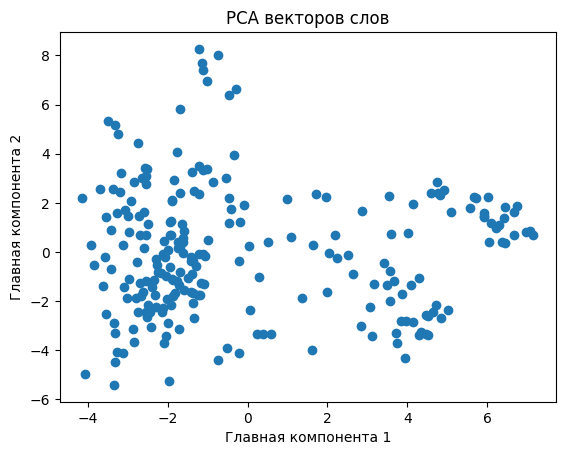

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Стандартизация векторов слов
scaler = StandardScaler()
scaled_vectors = scaler.fit_transform(word_vector_list)

# Применение PCA
pca = PCA(n_components=None)
reduced_vectors = pca.fit_transform(scaled_vectors)

# Количество выбранных компонент
n_components = pca.explained_variance_ratio_.shape[0]

print(f"Выбрано {n_components} компонент")

# Визуализация
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])
plt.title('PCA векторов слов')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.show()

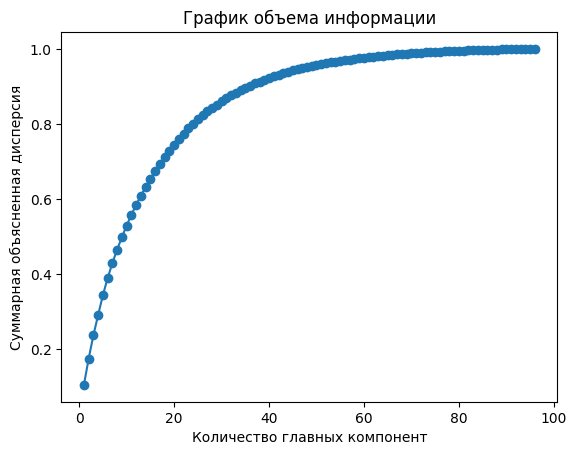

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Суммируем объясненную дисперсию для каждой компоненты
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Постройте график объема информации
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('График объема информации')
plt.xlabel('Количество главных компонент')
plt.ylabel('Суммарная объясненная дисперсия')
plt.show()